<a href="https://colab.research.google.com/github/hugocfrias/MVP-Machine-Learning/blob/main/MVP_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP: Machine Learning**

**Título:** Modelo Supervisionado- Base de dados 'Mental Health Lifestyle'

**Nome:** Hugo Coelho de Frias

**Matrícula:** 4052025000248

**Linkedin:** https://www.linkedin.com/in/hugo-frias-7059b622/

**E-mail:** hugofrias2@hotmail.com

Dataset: [Mental_Health_Lifestyle](https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-lifestyle-habits-2019-2024)


Link DataBase GitHub Raw : https://github.com/hugocfrias/MVP-Machine-Learning/blob/main/Mental_Health_Lifestyle_Dataset_CSV.csv



## ✅ Checklist do MVP (o que precisa conter)
- [ ] **Problema definido** e contexto de negócio
- [ ] **Carga e preparação** dos dados (sem vazamento de dados)
- [ ] **Divisão** em treino/validação/teste (ou validação cruzada apropriada)
- [ ] **Tratamento**: limpeza, transformação e **engenharia de atributos**
- [ ] **Modelagem**: comparar abordagens/modelos (com **baseline**)
- [ ] **Otimização de hiperparâmetros**
- [ ] **Avaliação** com **métricas adequadas** e discussão de limitações
- [ ] **Boas práticas**: seeds fixas, tempo de treino, recursos computacionais, documentação
- [ ] **Pipelines reprodutíveis** (sempre que possível)


# 1. Escopo, objetivo e definição do problema

O Conjunto de Dados de '**Mental Health and Lifestyle Habits Dataset (2019-2024)**' é uma coleção abrangente de dados que visa compreender como diversos fatores de estilo de vida afetam o bem-estar mental. Esta base de dados captura aspectos como rotinas de exercícios, hábitos alimentares, padrões de sono, níveis de estresse e interações sociais, além de informações demográficas.

O objetivo é identificar 'níveis de stress' de acordo com hábitos do cotidiano.

Uma definição de como os principais hábitos cotidianos impactam nos níveis de stress dos cidadão, hoje em dia, é primordial para um melhor monitoramento da qualidade de vida. Há comprovação científica de níveis de stress elevados estão diretamente relacionados com diferentes doenças e enfermidades.


## 1.1. Hipóteses e Premissas do Problema

Hipóteses levantadas:

1. Podemos segregar os diferentes níveis de stress e bem-estar de acordo com as aferições de horas de sono, horas de trabalho e horas em telas diários, por exemplo?

2. Há algum padrão facilmente de ser identificado apenas com uma análise gráfica?

Premissas:

3. De maneira empírica, pela natureza dos atributos do dataset original, creio que há relação entre alguns desses atributos (exemplos: horas de sono vs horas trabalhadas / horas de sono vs horas de tela).


## 1.2. Tipo de Problema

O problema foi identificado como do tipo de **classificação supervisionada**. De acordo com os atributos numéricos (horas de sono, horas trabalhadas, idade, score de felididade etc), o objetivo é a previsão dos '**níveis de stress**' e  bem-estar' dos indivíduos.

## 1.3. Seleção de Dados

O dataset '**Mental Health Lifestyle**' foi coletado de acordo com as orientações do guia do MVP.

Fonte: https://www.kaggle.com/datasets.

## 1.4. Atributos do Dataset

O dataset '**Mental Health Lifestyle**' possui 3000 instâncias, de maneira balanceada em relação aos atributos categóricos (Países, Gêneros, Tipo de Dieta etc). No total, possui 12 atributos:

---
1. Country:	País do respondente (Australia, Brazil, Canada, Germany, India, Japan, USA)
2. Age: Idade do respondente (Anos)
3. Gender:	Identidade de gênero do respondente (Female, Male, Other)
4. Exercise Level: Nível de exercício físico do respondente (High, Low, Moderate)
5. Diet Type:	Classificação da dieta do respondente (Balanced, Junk Food, Keto, Vegan, Vegetarian)
6. Sleep Hours:	Horas de sono diária do respondente (Horas)
7. Stress Level: Nível de stress do respondente (High, Low, Moderate)
8. Mental Health Condition: Condição de saúde mental do respondente (Anxiety, Bipolar, Depression, None, PTSD)
9. Work Hours per Week: Horas de trabalho diária do respondente (Horas)
10. Screen Time per Day: Tempo de tela diária do respondente (Horas)
11. Social Interaction Score: Pontuação de interação Social do respondente (Escala 1-10)
12. Happiness Score: Pontuação de Felicidade do respondente (Escala 1-10)
---



# 2. Reprodutibilidade e ambiente

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados.


*Observações Iniciais Importações e Carga de Dados*


---

Foi realizada a importação das bibliotecas pandas, numpy, matplotlib e seaborn.

---


## 2.1. Bibliotecas Utilizadas

In [56]:
# === Tratamento de warnings ===
import warnings
warnings.filterwarnings("ignore")

In [57]:
# === Setup básico e reprodutibilidade ===
import os, random, time, sys, math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix,
                             mean_absolute_error, mean_squared_error, r2_score,
                             silhouette_score)
from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit, RandomizedSearchCV
from scipy.stats import randint, uniform

# === Parâmetros fixados ===

SEED = 42
np.random.seed(SEED)
random.seed(SEED)

print("Python:", sys.version.split()[0])
print("Seed global:", SEED)

Python: 3.12.11
Seed global: 42


# 3. Dados: carga, entendimento e qualidade

Demonstração o carregamento do dataset **'Mental Health Lifestyle'**.



## 3.3. Carga do Dataset

In [58]:
# === importação dos dados uma url para um dataframe ===

url_dados ='https://raw.githubusercontent.com/hugocfrias/MVP-Machine-Learning/refs/heads/main/Mental_Health_Lifestyle_Dataset_CSV.csv'

# === Carga do dataset através da url ===
Mental_Health_Lifestyle = pd.read_csv(url_dados)

In [59]:
# === Exibição as primeiras linhas ===
Mental_Health_Lifestyle.head()

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


>**Com o objetivo de facilitar as próximas análises, realizei uma reordenação dos atributos. Nesse caso, iniciando o dataframe (df) com os atributos categóricos e, posteriormente, os atributos núméricos**


In [60]:
# === Reordenação das colunas com o objetivo de iniciar o df com os atributos categóricos ===
new_order = ['Country', 'Gender', 'Exercise Level', 'Diet Type', 'Mental Health Condition', 'Age', 'Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score', 'Stress Level' ]
df = Mental_Health_Lifestyle[new_order]

In [61]:
# === Verificações iniciais ===
display(df.sample(5))
print("\nFormato:", df.shape)
print("\nTipos:")
print(df.dtypes)
print("\nValores ausentes por coluna:")
print(df.isna().sum())

,Country,Gender,Exercise Level,Diet Type,Mental Health Condition,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Stress Level
1801,Brazil,Male,Moderate,Junk Food,Depression,51,5.9,36,6.4,7.1,5.6,Low
1190,Canada,Female,High,Keto,PTSD,25,5.8,52,6.3,1.2,9.8,Low
1817,India,Male,Low,Balanced,Depression,53,6.3,54,4.6,2.0,6.0,High
251,India,Female,Low,Balanced,PTSD,20,7.1,37,2.5,4.2,8.6,Low
2505,Australia,Female,Moderate,Balanced,NaN,60,4.7,22,6.8,8.7,2.8,High



Formato: (3000, 12)

Tipos:
Country                         object
Gender                          object
Exercise Level                  object
Diet Type                       object
Mental Health Condition         object
Age                              int64
Sleep Hours                    float64
Work Hours per Week              int64
Screen Time per Day (Hours)    float64
Social Interaction Score       float64
Happiness Score                float64
Stress Level                    object
dtype: object

Valores ausentes por coluna:
Country                          0
Gender                           0
Exercise Level                   0
Diet Type                        0
Mental Health Condition        595
Age                              0
Sleep Hours                      0
Work Hours per Week              0
Screen Time per Day (Hours)      0
Social Interaction Score         0
Happiness Score                  0
Stress Level                     0
dtype: int64


## 3.4. Análise exploratória resumida (EDA)

**Importante:** A análise exploratória mais detalhada do dataset foi realizada no MVP de **'Análise de Dados e Boas Práticas'**.

Link MVP **'Análise de Dados e Boas Práticas'**: https://github.com/hugocfrias/hugocfrias-MVP/blob/main/Untitled5.ipynb


### 3.4.1 Balanceamento de classes

>**Análise de balanceamento do atributo categórico 'Nivel de Stress (Target)'**

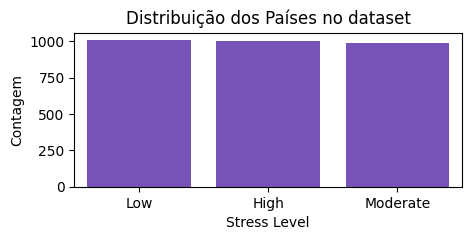

In [62]:
# === Exemplo 3 de balenceamento das variáveis categóricas (Variável Target:Stress Level) ===
plt.figure(figsize=(5, 2))
# === Gráfico de barras simples ===
sns.countplot(x='Stress Level', data=df, color='#7442c8')
plt.title('Distribuição dos Países no dataset')
plt.xlabel('Stress Level')
plt.ylabel('Contagem')
plt.show()

>**Análise de balanceamento do atributo categórico 'Gênero'**



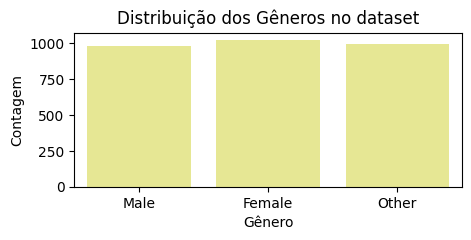

In [63]:
# === Exemplo 1 de balenceamento das variáveis categóricas (Gênero) ===
plt.figure(figsize=(5, 2))
# === Gráfico de barras simples ===
sns.countplot(x='Gender', data=df, color='#f3f586')
plt.title('Distribuição dos Gêneros no dataset')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

>**Análise de balanceamento do atributo categórico 'Países'**

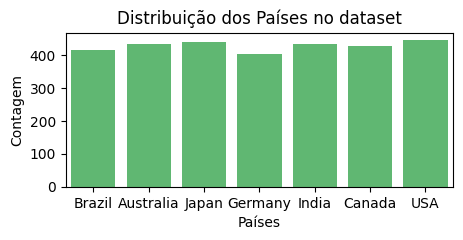

In [64]:
# ===Exemplo 2 de balenceamento das variáveis categóricas (Países) ===
plt.figure(figsize=(5, 2))
# === Gráfico de barras simples ===
sns.countplot(x='Country', data=df, color='#52c569')
plt.title('Distribuição dos Países no dataset')
plt.xlabel('Países')
plt.ylabel('Contagem')
plt.show()

*Comentários Total e Tipo de Instâncias:*


---


>Os gráficos de barras acima mostram que o dataset é balanceado em relação à classe Targer (Stress Level) e também em classes categóricas como 'Gênero' e 'Países'. Estes atributos foram utilizados como exemplos, porém os demais têm o mesmo comportamento. Esse balanceamento é essencial para que um modelo construído a partir desses dados não desfavoreça algum tipo dessas classes.


---

### 3.4.2 Estatísticas Descritivas

*Observações Iniciais Estatísticas Descritivas*


---


Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.


---

In [65]:
# === Estatísticas descritivas básicas do dataset ===
df.describe()

,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,41.229667,6.475933,39.466333,5.089833,5.470200,5.395067
std,13.428416,1.499866,11.451459,1.747231,2.563532,2.557601
min,18.000000,1.400000,20.000000,2.000000,1.000000,1.000000
25%,30.000000,5.500000,30.000000,3.600000,3.300000,3.200000
50%,41.000000,6.500000,39.000000,5.100000,5.500000,5.400000
75%,53.000000,7.500000,50.000000,6.600000,7.600000,7.500000
max,64.000000,11.300000,59.000000,8.000000,10.000000,10.000000


### 3.4.3 Histogramas

*Observações Iniciais Histograma*


---


A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.


---


**Histograma dos atributos numéricos**


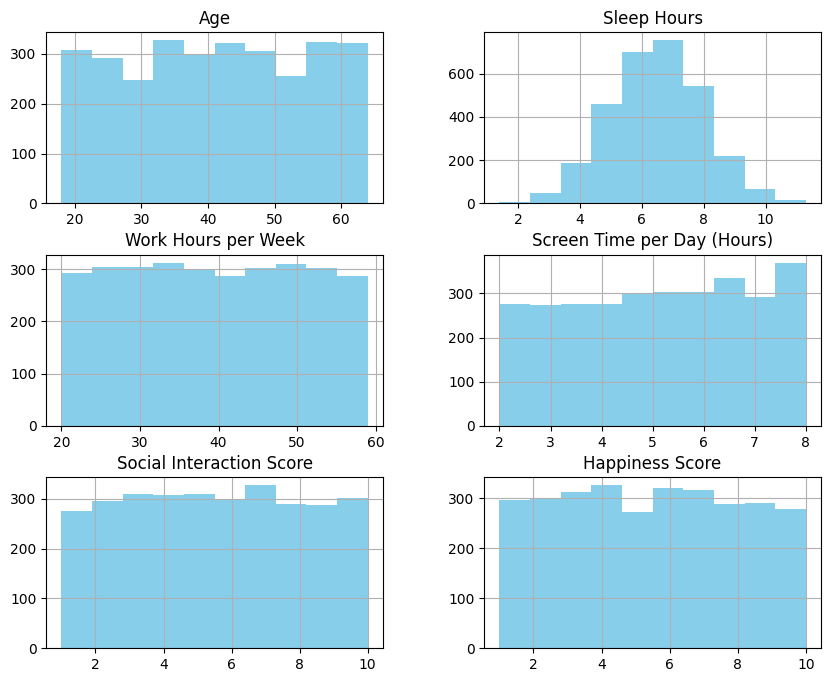

In [66]:
# === Histogramas Variáveis Categóricas ===
df.hist(figsize = (10,8),color='skyblue',grid=1)
plt.show()

*Comentários Histogramas:*:


---


> Podemos analisar que o atributo 'Horas de Sono' é o único com uma distribuição normal. Sendo os demais, distribuições uniformes.


---



**Densidade dos atributos numéricos**

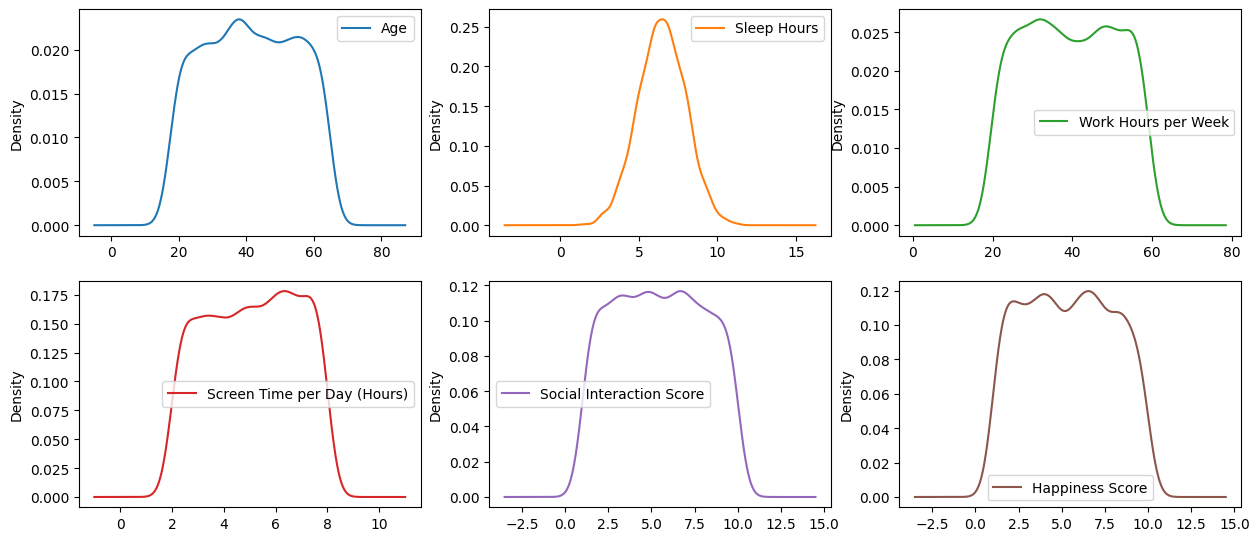

In [67]:
# === Densidade Variáveis Numéricas ===
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

*Comentários Densidades:*:


---


> As densidade confiram as análises dos histogramas. O 'formato de sino' do atributo 'Horas de Sono' demonstra sua distribuição normal.


---


### 3.4.4 Boxplot

*Observações Iniciais Boxplot*


---


Para entender as diferenças entre os atributos categóricos, devemos olhar como se comportam os valores quando agrupados. Isso nos permite comparar a média, mediana e desvio padrão.


---


**Boxplots dos atributos numéricos**

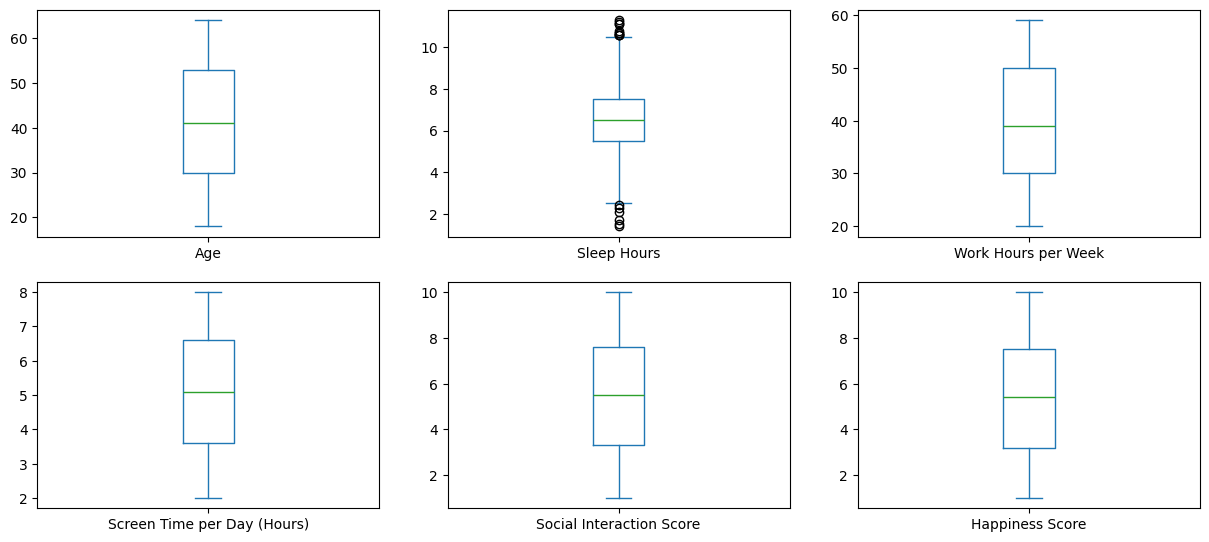

In [68]:
# === Boxplot ===
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

*Comentários Boxplot:*:


---


> Com uma análise inicial dos boxplots, se destacam os *outliers* do atributo 'Horas de Sono'


---

# 4. Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

### *4.1. Tratamento de Nulos*

A limpeza consiste na verificação da consistência das informações, correção de possíveis erros de preenchimento ou eliminação de valores desconhecidos, redundantes ou não pertencentes ao domínio.

>**No dataframe 'df', podemos ver abaixo que há 595 instâncias com valores nulos no atributo 'Mental Health Condition'. Analisando o dataset original, as 595 linhas nulas estão com o status de 'NaN'. Por ser tratar de um estado de desordem mental (Mental Health Condition), tive a dúvida se realmente são informações faltantes ou simplesmente instâncias nas quais o respondente não
possuía algum tipo de desordem mental.**

>**Com a impossibilidade de pesquisar essa dúvida, optei por exluir do dataframe o atributo 'Mental Health Condition'.**

>**Dessa forma, foi criado o dataframe 'df_cleaned'.**

In [69]:
# === Criação do novo DataFrame com a limpeza dos dados (exclusão coluna 'Mental Health Condition') ===
df_cleaned = df.dropna(axis=1, how='any')

As demonstrações do datraframe após a limpeza podem ser vistas nos código que exibem as primeiras do dataframe 'df_cleaned';

In [70]:
# === Verificações iniciais ===
display(df_cleaned.sample(5))
print("\nFormato:", df_cleaned.shape)
print("\nTipos:")
print(df_cleaned.dtypes)
print("\nValores ausentes por coluna:")
print(df_cleaned.isna().sum())

,Country,Gender,Exercise Level,Diet Type,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Stress Level
2509,Germany,Male,Low,Balanced,40,3.7,28,7.8,7.9,6.3,Moderate
1825,Brazil,Female,Moderate,Balanced,56,5.9,44,4.7,6.5,1.3,Low
2340,Japan,Other,Low,Keto,51,6.5,52,5.0,9.8,6.5,Low
2399,India,Other,Moderate,Balanced,49,4.4,51,3.2,3.0,8.7,Low
1335,Germany,Other,Low,Keto,34,4.3,28,3.0,5.6,7.6,High



Formato: (3000, 11)

Tipos:
Country                         object
Gender                          object
Exercise Level                  object
Diet Type                       object
Age                              int64
Sleep Hours                    float64
Work Hours per Week              int64
Screen Time per Day (Hours)    float64
Social Interaction Score       float64
Happiness Score                float64
Stress Level                    object
dtype: object

Valores ausentes por coluna:
Country                        0
Gender                         0
Exercise Level                 0
Diet Type                      0
Age                            0
Sleep Hours                    0
Work Hours per Week            0
Screen Time per Day (Hours)    0
Social Interaction Score       0
Happiness Score                0
Stress Level                   0
dtype: int64


*Comentários Tratamento de Nulos:*:


---


> Como citado anteriormente, optei pela remoção do atributo categórico 'Mental Health Condition' pela presença de linhas 'NaN';

> Após a limpeza foi criado o dataframe 'df_cleaned';

---


# 5. Definição do target, variáveis e divisão dos dados
**Separação em conjunto de treino e conjunto de teste com holdout**

In [71]:
# === Preparação dos dados ===

test_size = 0.20 # tamanho do conjunto de teste

# Divisão dos dados

target = "Stress Level"
features = [c for c in df_cleaned.columns if c not in [target]]

X = df_cleaned[features].copy()
y = df_cleaned[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=SEED) # faz a divisão

# Parâmetros e partições da validação cruzada
scoring = 'f1_weighted'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=SEED) # validação cruzada com estratificação

In [72]:
print("Treino:", X_train.shape, "| Teste:", X_test.shape)

print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Treino: (2400, 10) | Teste: (600, 10)
Dimensões de X_train: (2400, 10)
Dimensões de X_test: (600, 10)
Dimensões de y_train: (2400,)
Dimensões de y_test: (600,)


Defina, se necessário, funções em Python para reutilizar seu código e torná-lo mais organizado. Essa é uma boa prática de programação que facilita a leitura, manutenção e evolução do seu projeto.

In [94]:
def evaluate_classification(y_true, y_pred, proba=None):
    acc = accuracy_score(y_true, y_pred)
    f1w = f1_score(y_true, y_pred, average="weighted")
    auc = roc_auc_score(y_true, proba[:,1]) if (proba is not None and proba.shape[1]==2) else np.nan
    return {"accuracy": acc, "f1_weighted": f1w}

 Tratamento de dados e **Pipeline**

In [95]:
num_cols = [c for c in X_train.columns if str(X_train[c].dtype).startswith(("float","int"))]
cat_cols = [c for c in X_train.columns if c not in num_cols]

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(transformers=[
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

print("num_cols:", num_cols[:10], "...")
print("cat_cols:", cat_cols[:10], "...")

num_cols: ['Age', 'Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score'] ...
cat_cols: ['Country', 'Gender', 'Exercise Level', 'Diet Type'] ...


Baseline e modelos candidatos

In [96]:
# === Baselines ===
baseline = Pipeline(steps=[("pre", preprocess),
                               ("KNN", KNeighborsClassifier())])
candidates = {
        "LR": Pipeline([("pre", preprocess), ("model", LogisticRegression(max_iter=200, random_state=SEED))]),
        "CART": Pipeline([("pre", preprocess), ("model", DecisionTreeClassifier())]),
        "NB": Pipeline([("pre", preprocess), ("model", GaussianNB())]),
        "SVC": Pipeline([("pre", preprocess), ("model", SVC())])
             }
baseline


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Sleep Hours',
                                                   'Work Hours per Week',
                                                   'Screen Time per Day '
                                                   '(Hours)',
                                                   'Social Interaction Score',
                                                   'Happiness Score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Country', 'Gender',
                                                   'Exercise Level',
                                                   'Diet Type'])])),
                ('KNN', KNeighborsClassifier())])

Treino e avaliação rápida (baseline vs candidatos)

In [97]:
results = {}
# Baseline
baseline.fit(X_train, y_train)
y_pred = baseline.predict(X_test)
proba = baseline.predict_proba(X_test) if hasattr(baseline, "predict_proba") else None
results["baseline"] = evaluate_classification(y_test, y_pred, proba)

# Candidatos
for name, pipe in candidates.items():
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  proba = pipe.predict_proba(X_test) if hasattr(pipe, "predict_proba") else None
  results[name] = evaluate_classification(y_test, y_pred, proba)

pd.DataFrame(results).T


,accuracy,f1_weighted
baseline,0.346667,0.337802
LR,0.303333,0.302643
CART,0.371667,0.371975
NB,0.323333,0.323019
SVC,0.351667,0.351392


Validação e Otimização de Hiperparâmetros

Use **validação cruzada** apropriada ao problema (Ex: **`StratifiedKFold`** para classificação; **`KFold`** para regressão).  
Faça **tuning** com `GridSearchCV`/`RandomizedSearchCV`.


In [77]:
cv = kfold
model = Pipeline([("pre", preprocess), ("model", DecisionTreeClassifier())])
param_dist = {
     'model__criterion': ['gini', 'entropy'],
     'model__max_depth': [None, 5, 10, 15],
     'model__min_samples_split': [2, 5, 10],
     'model__min_samples_leaf': [1, 2, 4]
             }

# Executar busca aleatória (exemplo geral — ajuste para seu caso)
search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=cv, scoring=scoring, random_state=SEED, n_jobs=-1, verbose=1)
search.fit(X_train, y_train)
print("Melhor score (CV):", search.best_score_)
print("Melhores parâmetros:", search.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Melhor score (CV): 0.34530858737488956
Melhores parâmetros: {'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': None, 'model__criterion': 'gini'}


Avaliação final, análise de erros e limitações

              precision    recall  f1-score   support

        High       0.42      0.40      0.41       205
         Low       0.33      0.34      0.33       192
    Moderate       0.35      0.36      0.36       203

    accuracy                           0.36       600
   macro avg       0.37      0.36      0.36       600
weighted avg       0.37      0.36      0.37       600



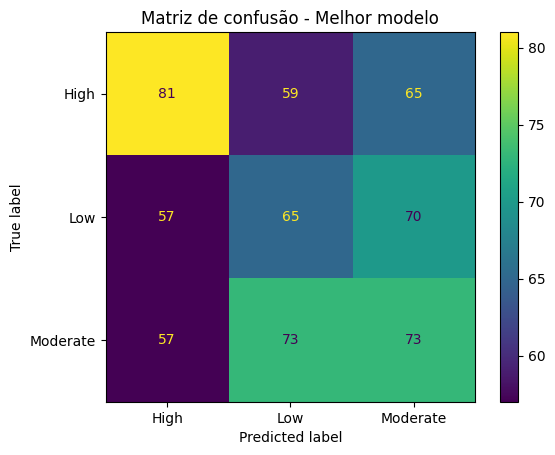

In [78]:
# Exemplo de re-treino no conjunto de treino+validação (se aplicável) e avaliação no teste

if 'search' in globals() and hasattr(search, "best_estimator_"):
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    from sklearn.metrics import classification_report, ConfusionMatrixDisplay
    print(classification_report(y_test, y_pred))
    try:
            ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
            plt.title("Matriz de confusão - Melhor modelo")
            plt.show()
    except Exception as e:
            print("Não foi possível plotar a matriz de confusão:", e)

In [79]:
cv2 = kfold
model2 = Pipeline([("pre", preprocess), ("model", KNeighborsClassifier())])
param_dist2 = {
     'model__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
     'model__metric': ["euclidean", "manhattan", "minkowski"]
             }

# Executar busca aleatória (exemplo geral — ajuste para seu caso)
search2 = RandomizedSearchCV(model2, param_distributions=param_dist2, n_iter=10, cv=cv2, scoring=scoring, random_state=SEED, n_jobs=-1, verbose=1)
search2.fit(X_train, y_train)
print("Melhor score (CV2):", search2.best_score_)
print("Melhores parâmetros:", search2.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Melhor score (CV2): 0.32730762987521755
Melhores parâmetros: {'model__n_neighbors': 19, 'model__metric': 'minkowski'}


              precision    recall  f1-score   support

        High       0.35      0.40      0.37       205
         Low       0.37      0.37      0.37       192
    Moderate       0.42      0.35      0.38       203

    accuracy                           0.37       600
   macro avg       0.38      0.37      0.37       600
weighted avg       0.38      0.37      0.37       600



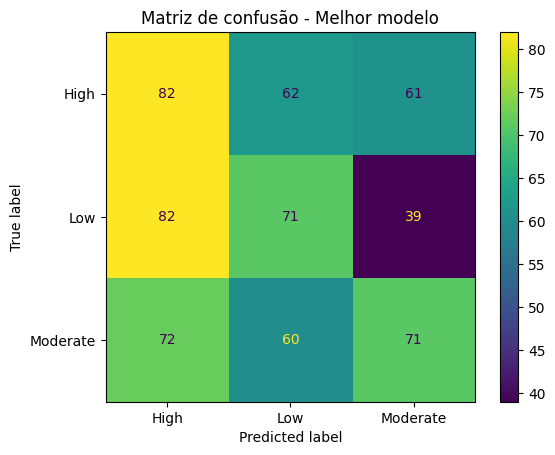

In [80]:
# Exemplo de re-treino no conjunto de treino+validação (se aplicável) e avaliação no teste

if 'search2' in globals() and hasattr(search2, "best_estimator_"):
    best_model2 = search2.best_estimator_
    y_pred2 = best_model2.predict(X_test)
    from sklearn.metrics import classification_report, ConfusionMatrixDisplay
    print(classification_report(y_test,y_pred2))
    try:
            ConfusionMatrixDisplay.from_estimator(best_model2, X_test, y_test)
            plt.title("Matriz de confusão - Melhor modelo")
            plt.show()
    except Exception as e:
            print("Não foi possível plotar a matriz de confusão:", e)

In [81]:
cv3 = kfold
model3 = Pipeline([("pre", preprocess), ("model", SVC())])
param_dist3 = {
        "model__degree": randint(1, 10),
        "model__cache_size": randint(200, 400),
        "model__C": randint(1.0, 10.0)
             }

# Executar busca aleatória (exemplo geral — ajuste para seu caso)
search3 = RandomizedSearchCV(model3, param_distributions=param_dist3, n_iter=10, cv=cv3, scoring=scoring, random_state=SEED, n_jobs=-1, verbose=1)
search3.fit(X_train, y_train)
print("Melhor score (CV3):", search3.best_score_)
print("Melhores parâmetros:", search3.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Melhor score (CV3): 0.32945325858715746
Melhores parâmetros: {'model__C': 5, 'model__cache_size': 302, 'model__degree': 3}


              precision    recall  f1-score   support

        High       0.34      0.33      0.33       205
         Low       0.35      0.41      0.38       192
    Moderate       0.35      0.31      0.33       203

    accuracy                           0.35       600
   macro avg       0.35      0.35      0.35       600
weighted avg       0.35      0.35      0.35       600



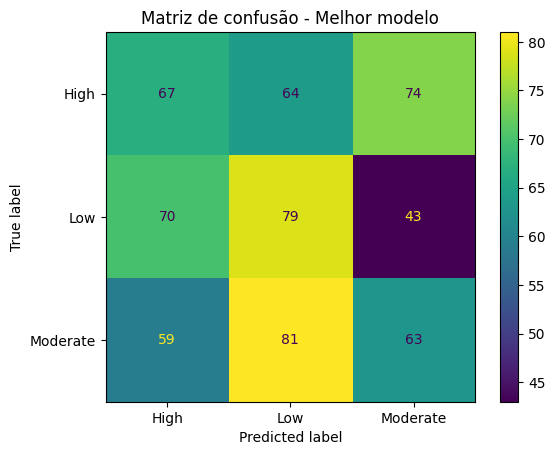

In [82]:
# Exemplo de re-treino no conjunto de treino+validação (se aplicável) e avaliação no teste

if 'search3' in globals() and hasattr(search3, "best_estimator_"):
    best_model3 = search3.best_estimator_
    y_pred3 = best_model3.predict(X_test)
    from sklearn.metrics import classification_report, ConfusionMatrixDisplay
    print(classification_report(y_test, y_pred3))
    try:
            ConfusionMatrixDisplay.from_estimator(best_model3, X_test, y_test)
            plt.title("Matriz de confusão - Melhor modelo")
            plt.show()
    except Exception as e:
            print("Não foi possível plotar a matriz de confusão:", e)

NOVO!!!!!!!!!!!!!!!!

In [83]:
# Definindo os parâmetros do classificador base para o BaggingClassifier
base = SVC()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = KNeighborsClassifier(n_neighbors=19,metric='minkowski')
bases.append(('KNN', model1))
model2 = DecisionTreeClassifier(min_samples_split= 2, min_samples_leaf=1,max_depth=None,criterion='gini')
bases.append(('CART', model2))
model3 = SVC()
bases.append(('SVC', model3))

# === Baselines ===
baseline2 = Pipeline(steps=[("pre", preprocess),
                               ("KNN", KNeighborsClassifier(n_neighbors=19,metric='minkowski'))])
candidates2 = {
        "LR": Pipeline([("pre", preprocess), ("model", LogisticRegression(max_iter=200, random_state=SEED))]),
        "RF": Pipeline([("pre", preprocess), ("model", RandomForestClassifier(random_state=SEED,max_depth=14,min_samples_split=7,n_estimators=393))]),
        "CART": Pipeline([("pre", preprocess), ("model", DecisionTreeClassifier(min_samples_split= 2, min_samples_leaf=1,max_depth=None,criterion='gini'))]),
        "NB": Pipeline([("pre", preprocess), ("model", GaussianNB())]),
        "SVM": Pipeline([("pre", preprocess), ("model", SVC())]),
        "Bagging": Pipeline([("pre", preprocess), ("model", BaggingClassifier(base, n_estimators=num_trees))]),
        "Voting": Pipeline([("pre", preprocess), ("model", VotingClassifier(bases))]),
        "ET": Pipeline([("pre", preprocess), ("model", ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))]),
        "Ada": Pipeline([("pre", preprocess), ("model", AdaBoostClassifier(n_estimators=num_trees))]),
        "GB": Pipeline([("pre", preprocess), ("model", GradientBoostingClassifier(n_estimators=num_trees))])
             }
baseline2


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Sleep Hours',
                                                   'Work Hours per Week',
                                                   'Screen Time per Day '
                                                   '(Hours)',
                                                   'Social Interaction Score',
                                                   'Happiness Score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Country', 'Gender',
                                                   'Exercise Level',
                                                   'Diet Type'])])),
                ('KNN', KNeighborsClassifier(n_neighbors=19))])

In [98]:
results2 = {}
# Baseline
baseline2.fit(X_train, y_train)
y_pred = baseline2.predict(X_test)
proba = baseline2.predict_proba(X_test) if hasattr(baseline, "predict_proba") else None
results2["baseline2"] = evaluate_classification(y_test, y_pred, proba)

# Candidatos
for name, pipe in candidates2.items():
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  proba = pipe.predict_proba(X_test) if hasattr(pipe, "predict_proba") else None
  results[name] = evaluate_classification(y_test, y_pred, proba)

pd.DataFrame(results).T

,accuracy,f1_weighted
baseline,0.346667,0.337802
LR,0.303333,0.302643
CART,0.341667,0.342693
NB,0.323333,0.323019
SVC,0.351667,0.351392
RF,0.338333,0.338314
SVM,0.351667,0.351392
Bagging,0.350000,0.350101
Voting,0.348333,0.346762
ET,0.313333,0.313305


INTERVALOS AGRUPADOS

INTERVALOS AGRUPADOS

INTERVALOS AGRUPADOS

In [85]:
df_agrup = df_cleaned.copy(deep=True)

# Criando uma nova coluna com base em intervalos
df_agrup['Age'] = pd.cut(df_agrup['Age'], bins=[0, 18, 24, 31, 38, 45, 52, 59, 64], labels=['0-18', '18-24', '24-31', '31-38', '38-45', '45-52', '52-59', '59-64'])
df_agrup['Sleep Hours'] = pd.cut(df_agrup['Sleep Hours'], bins=[0, 1.4, 2.8, 3.8, 4.8, 5.8, 6.8, 7.8, 8.8, 9.8, 11.3], labels=['0-1.4', '1.4-2.8', '2.8-3.8', '3.8-4.8', '4.8-5.8', '5.8-6.8', '6.8-7.8', '7.8-8.8', '8.8-9.8', '9.8-11.3'])
df_agrup['Work Hours per Week'] = pd.cut(df_agrup['Work Hours per Week'], bins=[0, 20, 25, 31, 37, 43, 49, 59], labels=['0-20', '20-25', '25-31', '31-37', '37-43', '43-49', '49-59'])
df_agrup['Screen Time per Day (Hours)'] = pd.cut(df_agrup['Screen Time per Day (Hours)'], bins=[0, 2, 2.7, 3.5, 4.3, 5.1, 5.9, 6.7, 7.5, 8], labels=['0-2', '2-2.7', '2.7-3.5', '3.5-4.3', '4.3-5.1', '5.1-5.9', '5.9-6.7', '6.7-7.5', '7.5-8'])
df_agrup['Social Interaction Score'] = pd.cut(df_agrup['Social Interaction Score'], bins=[0, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 10], labels=['0-1.9', '1.9-2.9', '2.9-3.9', '3.9-4.9', '4.9-5.9', '5.9-6.9', '6.9-7.9', '7.9-8.9', '8.9-10'])
df_agrup['Happiness Score'] = pd.cut(df_agrup['Happiness Score'], bins=[0, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, 10], labels=['0-1.9', '1.9-2.9', '2.9-3.9', '3.9-4.9', '4.9-5.9', '5.9-6.9', '6.9-7.9', '7.9-8.9', '8.9-10'])

df_agrup.head()

,Country,Gender,Exercise Level,Diet Type,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Stress Level
0,Brazil,Male,Low,Vegetarian,45-52,5.8-6.8,20-25,3.5-4.3,6.9-7.9,5.9-6.9,Low
1,Australia,Male,Moderate,Vegan,24-31,4.8-5.8,43-49,5.1-5.9,7.9-8.9,5.9-6.9,Low
2,Japan,Female,Low,Vegetarian,31-38,6.8-7.8,37-43,4.3-5.1,8.9-10,8.9-10,High
3,Brazil,Male,Low,Vegan,31-38,6.8-7.8,37-43,2-2.7,7.9-8.9,5.9-6.9,Low
4,Germany,Male,Low,Balanced,45-52,6.8-7.8,31-37,3.5-4.3,3.9-4.9,3.9-4.9,Low


In [86]:
# Tratamento para a criação de um nodo Dataframe (df_final) com os atributos transformados
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df_agrup[['Country','Gender','Exercise Level','Diet Type','Age','Sleep Hours','Work Hours per Week','Screen Time per Day (Hours)','Social Interaction Score','Happiness Score']])

# Criação do df_encoded: criação do Dataframe com os atributos categóricos transformados
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Criação do df_final: concatenação de df_cleaned e df_encoded
df_final = pd.concat([df_agrup, df_encoded], axis=1)

# remoção das colunas não transformadas
df_final.drop(['Country','Gender','Exercise Level','Diet Type','Age','Sleep Hours','Work Hours per Week','Screen Time per Day (Hours)','Social Interaction Score','Happiness Score'], axis=1, inplace= True)

print(df_final)

     Stress Level  Country_Australia  Country_Brazil  Country_Canada  \
0             Low                0.0             1.0             0.0   
1             Low                1.0             0.0             0.0   
2            High                0.0             0.0             0.0   
3             Low                0.0             1.0             0.0   
4             Low                0.0             0.0             0.0   
...           ...                ...             ...             ...   
2995         High                0.0             0.0             0.0   
2996          Low                1.0             0.0             0.0   
2997         High                1.0             0.0             0.0   
2998          Low                1.0             0.0             0.0   
2999         High                0.0             0.0             0.0   

      Country_Germany  Country_India  Country_Japan  Country_USA  \
0                 0.0            0.0            0.0          0.0   

In [87]:
# Exibição das primeiras linhas df_final
df_final.head()

,Stress Level,Country_Australia,Country_Brazil,Country_Canada,Country_Germany,Country_India,Country_Japan,Country_USA,Gender_Female,Gender_Male,...,Social Interaction Score_8.9-10,Happiness Score_0-1.9,Happiness Score_1.9-2.9,Happiness Score_2.9-3.9,Happiness Score_3.9-4.9,Happiness Score_4.9-5.9,Happiness Score_5.9-6.9,Happiness Score_6.9-7.9,Happiness Score_7.9-8.9,Happiness Score_8.9-10
0,Low,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Low,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,High,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Low,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Low,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [88]:
#Resumo para a análise dos dados do 'df_final'
print(f"Total de instâncias: {len(df_final)}")
print("\nTipos de dados por coluna:")
print(df_final.info())

Total de instâncias: 3000

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 71 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Stress Level                         3000 non-null   object 
 1   Country_Australia                    3000 non-null   float64
 2   Country_Brazil                       3000 non-null   float64
 3   Country_Canada                       3000 non-null   float64
 4   Country_Germany                      3000 non-null   float64
 5   Country_India                        3000 non-null   float64
 6   Country_Japan                        3000 non-null   float64
 7   Country_USA                          3000 non-null   float64
 8   Gender_Female                        3000 non-null   float64
 9   Gender_Male                          3000 non-null   float64
 10  Gender_Other                         3000 

In [92]:
test_size = 0.20 # tamanho do conjunto de teste

# Separação em conjuntos de treino e teste
array = df_final.values
X2 = array[:,1:71]
y2 = array[:,0]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,
    test_size=test_size, shuffle=True, random_state=SEED, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'f1_weighted'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=SEED) # validação cruzada com estratificação

LR: 0.335833 (0.029709)
KNN: 0.345417 (0.027160)
CART: 0.349583 (0.019848)
NB: 0.336250 (0.026813)
SVM: 0.341250 (0.022005)
Bagging: 0.332083 (0.023939)
RF: 0.347500 (0.022142)
ET: 0.338333 (0.030265)
Ada: 0.340833 (0.027563)
GB: 0.331250 (0.031250)
Voting: 0.335833 (0.025967)


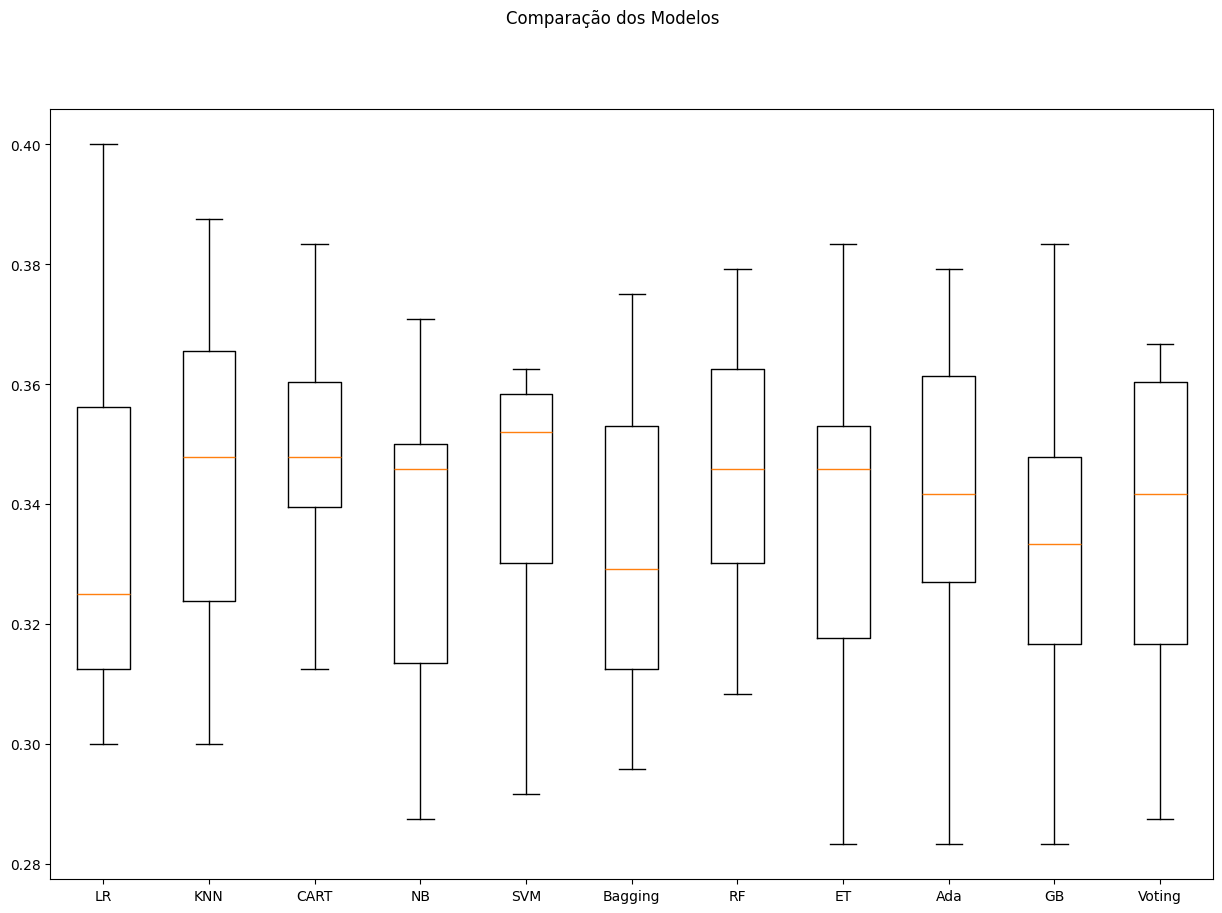

In [93]:
# Lista que armazenará os modelos
models = []
scoring = 'f1_weighted'

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train2, y_train2, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
